In [3]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pickle
from astropy.coordinates import SkyCoord
from dustmaps.config import config
config['data_dir'] = '/home/weissj3/Desktop/MWTools/Data'

import dustmaps.sfd
dustmaps.sfd.fetch()
import astropy.units as u
filenames = ["N12toN10", "N15toN12", "N17toN15", "N20toN17", "P10toP11", "P11toP12", "P12toP13", "P13top14", "P14top15", "P15toP16", "P16toP17", "P17toP20"]


Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [33]:
#Read in original data to inspect it -- Check to see if everything is there and look for observational artifacts

filenames = ["N12toN10", "N15toN12", "N17toN15", "N20toN17", "P10toP11", "P11toP12", "P12toP13", "P13top14", "P14top15", "P15toP16", "P16toP17", "P17toP20"]
del data
data = {"ID":[], "g":[], "r":[], "g_err":[], "r_err":[], "l":[], "b":[]}
starLen = 0
count = 0
for name in filenames:
    f = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/PS_MSTO/" + name + ".csv", "r")
    f.readline()


    for line in f:
        if count % 10 == 0:
            ln = [line.split(",")[0]] + list(map(float, line.split(",")[1:]))
            data["ID"].append(ln[0])
            data["g"].append(ln[1])
            data["r"].append(ln[2])
            data["g_err"].append(ln[3])
            data["r_err"].append(ln[4])
            data["l"].append(ln[5])
            data["b"].append(ln[6])
        count += 1
    print("Stars In File %s: %d" % (name, len(data['ID'])))
    
    print("Check Duplicates %d" % (len(data['ID']) - len(np.unique(data['ID']))))


Stars In File N12toN10: 1025909
Check Duplicates 60
Stars In File N15toN12: 2264471
Check Duplicates 60
Stars In File N17toN15: 2909331
Check Duplicates 104
Stars In File N20toN17: 3746139
Check Duplicates 104
Stars In File P10toP11: 4249084
Check Duplicates 137
Stars In File P11toP12: 4714478
Check Duplicates 158
Stars In File P12toP13: 5138314
Check Duplicates 174
Stars In File P13top14: 5538426
Check Duplicates 192
Stars In File P14top15: 5910904
Check Duplicates 213
Stars In File P15toP16: 6261803
Check Duplicates 242
Stars In File P16toP17: 6591383
Check Duplicates 258
Stars In File P17toP20: 7457331
Check Duplicates 259


In [3]:
#Color cut data and print to a bunch of separate files

starLen = 0
for name in filenames:
    data = {"ID":[], "g":[], "r":[], "g_err":[], "r_err":[], "l":[], "b":[]}
    f = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/PS_MSTO/" + name + ".csv", "r")
    f.readline()


    for line in f:
        ln = list(map(float, line.split(",")))
        data["ID"].append(ln[0])
        data["g"].append(ln[1])
        data["r"].append(ln[2])
        data["g_err"].append(ln[3])
        data["r_err"].append(ln[4])
        data["l"].append(ln[5])
        data["b"].append(ln[6])
    print("Stars In File %s: %d" % (name, len(data['ID'])))
    coords = SkyCoord(data['l'],data['b'],  unit='deg', frame='galactic')

    sfd = dustmaps.sfd.SFDQuery()
    extinctionValues = sfd(coords) #3.303 is conversion from E(B-v) to sdss g
    data['g_0'] = np.array(data['g']) - (extinctionValues * 3.172)
    data['r_0'] = np.array(data['r']) - (extinctionValues * 2.271)
    data['(g-r)_0'] = np.array(data['g_0']) - np.array(data['r_0'])
    
    f.close()


    mask = np.where((np.array(data["(g-r)_0"]) > 0.1) & (np.array(data["(g-r)_0"]) < 0.3)) 

    data["ID"] = np.array(data["ID"])[mask]
    data["g"] = np.array(data["g"])[mask]
    data["r"] = np.array(data["r"])[mask]
    data["g_err"] = np.array(data["g_err"])[mask]
    data["r_err"] = np.array(data["r_err"])[mask]
    data["l"] = np.array(data["l"])[mask]
    data["b"] = np.array(data["b"])[mask]
    data['g_0'] = np.array(data['g_0'])[mask]
    data['r_0'] = np.array(data['r_0'])[mask]
    data['(g-r)_0'] = np.array(data['(g-r)_0'])[mask]
    
    print("Stars written to File %s: %d" % (name, len(data['ID'])))
    a = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/ColorCut/" + name + ".pk", "wb")
    pickle.dump(data, a)
    a.close()
    del data

Stars In File N12toN10: 10259083
Stars written to File N12toN10: 2620833
Stars In File N15toN12: 12385624
Stars written to File N15toN12: 2769248
Stars In File N17toN15: 6448598
Stars written to File N17toN15: 1408006
Stars In File N20toN17: 8368081
Stars written to File N20toN17: 1812049
Stars In File P10toP11: 5029446
Stars written to File P10toP11: 1275828
Stars In File P11toP12: 4653943
Stars written to File P11toP12: 1113111
Stars In File P12toP13: 4238357
Stars written to File P12toP13: 964408
Stars In File P13top14: 4001119
Stars written to File P13top14: 842237
Stars In File P14top15: 3724781
Stars written to File P14top15: 776245
Stars In File P15toP16: 3508989
Stars written to File P15toP16: 721820
Stars In File P16toP17: 3295805
Stars written to File P16toP17: 654662
Stars In File P17toP20: 8659477
Stars written to File P17toP20: 1697258


In [4]:
#loads cut data from files into a single data structure
data = {"ID":np.array([]), "g":np.array([]), "r":np.array([]), "g_err":np.array([]), "r_err":np.array([]), "l":np.array([]), "b":np.array([])}

for name in filenames:
    a = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/ColorCut/" + name + ".pk", "rb")
    temp = pickle.load(a)
    a.close()
    for i in data:
        data[i] = np.concatenate([data[i], temp[i]])
print("Total Stars: %d" % len(data['ID']))

Total Stars: 16655705


7457331


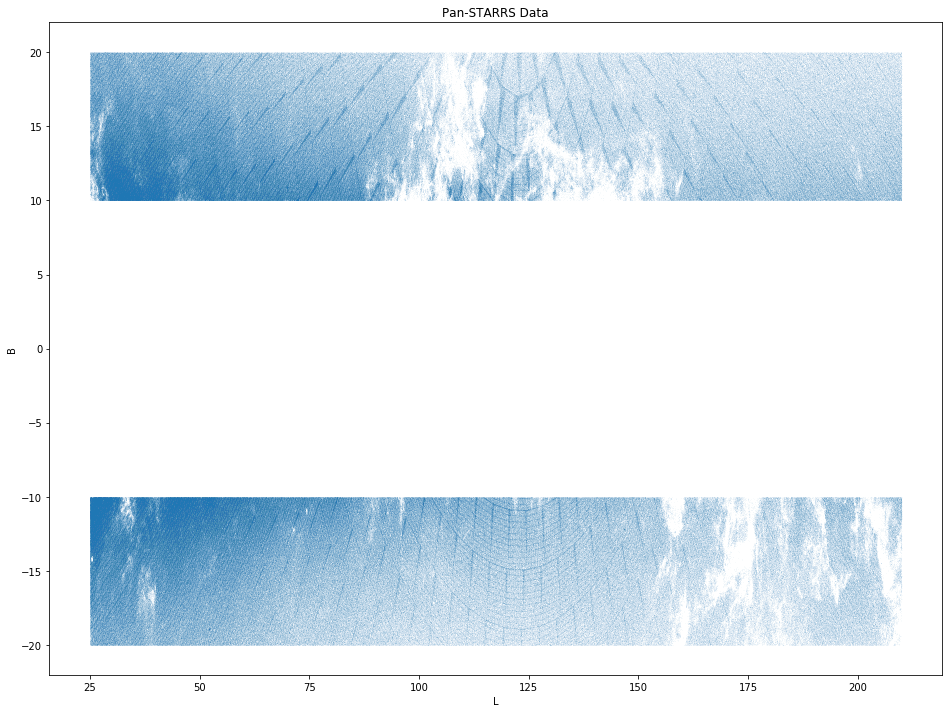

In [37]:
#Plot Pannstars data to make sure it was read in correctly/cut correctly
#Looks like there is a lot of dust
print(len(data['ID']))
plt.figure(1, figsize=(16, 12))
mask = np.where((np.array(data["g"]) > 16.0) & (np.array(data["g"]) < 21)) 

plt.plot(np.array(data["l"])[mask],np.array(data["b"])[mask], 'o', ms=0.1, alpha=0.1)
plt.title("Pan-STARRS Data")
plt.xlabel("L")
plt.ylabel("B")
plt.show()

In [12]:
#Slice the disk into l bins

for i in np.arange(0, 360, 2.5):
    temp = []
    mask = np.where((np.array(data["l"]) > i) & (np.array(data["l"]) < i+2.5)) 
    temp.append(np.array(data["l"])[mask])
    temp.append(np.array(data["b"])[mask])
    temp.append(np.array(data["g"])[mask])
    a = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/l_cuts/l-%d.pickle" % int((i+1.25)*100), "wb")
    pickle.dump(temp, a)
    a.close()


In [15]:
#Cut into b bins
for i in np.arange(0, 360, 2.5):
    a = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/l_cuts/l-%d.pickle" % int((i+1.25)*100), "rb")
    loadedData = pickle.load(a)
    a.close()
    for j in np.arange(-20, 20, 2.5):
        temp = []
        mask = np.where((np.array(loadedData[1]) > j) & (np.array(loadedData[1]) < j+2.5)) 
        temp.append(np.array(loadedData[0])[mask])
        temp.append(np.array(loadedData[1])[mask])
        temp.append(np.array(loadedData[2])[mask])
        b = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/lb_cuts/l-%d-b-%d.pickle" % (int((i+1.25)*100), int((j+1.25)*100)), "wb")
        pickle.dump(temp, b)
        b.close()
    a.close()

19558


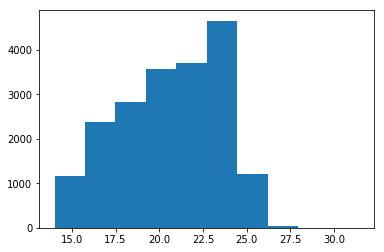

In [20]:
#Plot distance histogram
b = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/lb_cuts/l-9875-b-1625.pickle", "rb")
temp = pickle.load(b)
b.close()

print(len(temp[0]))

plt.hist(temp[2])
plt.show()